In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

mainData = pd.read_csv('BankChurners.csv')
mainData.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
mainData.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
mainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [8]:
# mainData.drop(['Unnamed: 21'] , axis=1 , inplace=True)
mainData.shape

(10127, 21)

In [9]:
mainData.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [10]:
columnEncoders = {}
categorical_columns = ['Card_Category', 'Attrition_Flag' , 'Gender' , 'Education_Level' , 'Marital_Status' , 'Income_Category']

for column in categorical_columns:
    columnEncoders[column] = LabelEncoder()

for column in categorical_columns:
    mainData[column] = columnEncoders[column].fit_transform(mainData[column])

# encodedData = LblEncoder.fit_transform(mainData.iloc[])

mainData.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [11]:
CleanedData = mainData
CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int32  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int32  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  int32  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
from numpy import int64

preprocessedData = pd.get_dummies(CleanedData , dtype= int64)
preprocessedData.drop('CLIENTNUM' , axis=1 , inplace=True)
preprocessedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [13]:
# preprocessedData.drop(['Income_Category_Unknown','Marital_Status_Unknown','Education_Level_Unknown'],axis=1 , inplace=True)
preprocessedData.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [14]:
preprocessedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [15]:
yData = preprocessedData.iloc[:,0]
yData.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int32

In [19]:
xData = preprocessedData.iloc[:,1:]
xData.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

In [21]:
x_train, x_test, y_train, y_test= train_test_split(xData, yData, test_size= 0.2)

In [16]:
def eval_bag_est_range(EST_Model, REP_NO, EST_Range, KFolds = 10):
    Ensemble_EST_Result_Dict = {}
    for EST_NO in EST_Range: 
        BAG_Classifier_Model = BaggingClassifier(EST_Model, 
                            n_estimators = EST_NO,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True)
        BAG_CV = cross_validate(BAG_Classifier_Model, x_train,y_train, n_jobs=-1,
                                cv=RepeatedKFold(n_splits=KFolds, n_repeats=REP_NO)) 
        Ensemble_EST_Result_Dict[EST_NO]=BAG_CV['test_score'].mean()
    return Ensemble_EST_Result_Dict

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

DT_Classifier_Model = DecisionTreeClassifier(criterion='entropy',random_state=42)

DT_Classifier_Model.fit(x_train, y_train)
DT_YPred = DT_Classifier_Model.predict(x_test)

DT_CV = cross_validate(DT_Classifier_Model, x_train,y_train, n_jobs=-1,cv=RepeatedKFold(n_splits=10, n_repeats=10)) 
DT_Accuracy = accuracy_score(y_test, DT_YPred)

print("Decision Tree Accuracy:", DT_Accuracy)
print("Decision Tree CV Mean Accuracy:", DT_CV['test_score'].mean())

# /////////////////////////////////////////////////////// #

KNN_Classifier_Model = KNeighborsClassifier(n_neighbors=5)

KNN_Classifier_Model.fit(x_train, y_train)
KNN_YPred = KNN_Classifier_Model.predict(x_test)

KNN_CV = cross_validate(KNN_Classifier_Model, x_train,y_train, n_jobs=-1,cv=RepeatedKFold(n_splits=10, n_repeats=10)) 
KNN_Accuracy = accuracy_score(y_test, KNN_YPred)

print("KNN Accuracy:", KNN_Accuracy)
print("KNN CV Mean Accuracy:", KNN_CV['test_score'].mean())

# ////////////////////////////////////////////////////// #

Ensemble_Classifier_Model = VotingClassifier(estimators=[('DT_Model', DT_Classifier_Model), ('KNN_Model', KNN_Classifier_Model)], voting='hard')

Ensemble_Classifier_Model.fit(x_train, y_train)
Ensemble_YPred = Ensemble_Classifier_Model.predict(x_test)

Ensemble_Accuracy = accuracy_score(y_test, Ensemble_YPred)
print("Ensemble Accuracy:", Ensemble_Accuracy)


Decision Tree Accuracy: 0.937314906219151
Decision Tree CV Mean Accuracy: 0.9393281728090608
KNN Accuracy: 0.8919052319842053
KNN CV Mean Accuracy: 0.8931857636510329
Ensemble Accuracy: 0.9210266535044422


In [24]:
Ensemble_KNN_Bag_Result  = eval_bag_est_range(KNN_Classifier_Model, 10, range(2,16))

In [138]:
KNN_Bag_Val = list(Ensemble_KNN_Bag_Result.values())
KNN_Bag_ValueSum = 0
for item in KNN_Bag_Val:
    KNN_Bag_ValueSum+=item
KNN_Bag_Mean = KNN_Bag_ValueSum/KNN_Bag_Val.__len__()
Ensemble_KNN_Bag_Result

{2: 0.8824219756130977,
 3: 0.8876808238571492,
 4: 0.888556316694829,
 5: 0.8894829124233153,
 6: 0.8898037782953524,
 7: 0.8905680230168518,
 8: 0.8907917522948349,
 9: 0.8911488027279232,
 10: 0.8904691510252546,
 11: 0.8915688602700524,
 12: 0.8909520786713552,
 13: 0.8917543499109466,
 14: 0.8907286842946521,
 15: 0.8911990074743877}

In [140]:
Ensemble_DT_Bag_Result  = eval_bag_est_range(DT_Classifier_Model, 10, range(2,16))

In [141]:
DT_Bag_Val = list(Ensemble_DT_Bag_Result.values())
DT_Bag_ValueSum = 0
for item in DT_Bag_Val:
    DT_Bag_ValueSum+=item
DT_Bag_Mean = DT_Bag_ValueSum/DT_Bag_Val.__len__()
Ensemble_DT_Bag_Result

{2: 0.9290081898585802,
 3: 0.9488583519812454,
 4: 0.94916636982235,
 5: 0.9541664611590628,
 6: 0.9541661871489246,
 7: 0.9555243183997807,
 8: 0.9557957711101976,
 9: 0.9579926321718346,
 10: 0.9581901478132469,
 11: 0.9582891720326985,
 12: 0.9586468313772055,
 13: 0.9586963815438949,
 14: 0.9595975704434397,
 15: 0.9593630938789179}

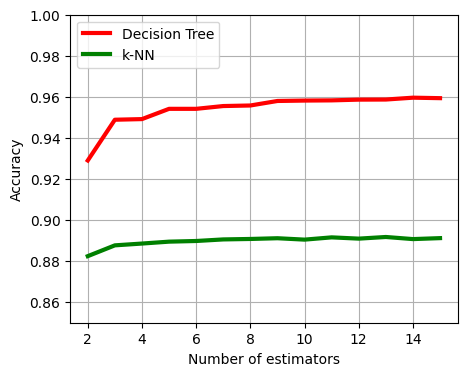

In [149]:

kNN_List = sorted(Ensemble_KNN_Bag_Result.items()) 
knc, kNN_accs = zip(*kNN_List)
DT_List = sorted(Ensemble_DT_Bag_Result.items())
nc, DT_accs = zip(*DT_List)

f = plt.figure(figsize=(5,4))

plt.plot(nc, DT_accs, lw = 3, color = 'r', label = 'Decision Tree')
plt.plot(knc, kNN_accs, lw = 3, color = 'green', label = 'k-NN')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim([0.85,1])
plt.legend(loc = 'upper left')
plt.grid(axis = 'both')
plt.show()

In [150]:
Classifiers_Models_Dict = {}
Classifiers_Models_Dict['DT Classifier'] = DT_Accuracy
Classifiers_Models_Dict['KNN Classifier'] = KNN_Accuracy

Ensemble_Bag_Dict = {}
Ensemble_Bag_Dict['DT Ensemble Bag'] = DT_Bag_Mean
Ensemble_Bag_Dict['KNN Ensemble Bag'] = KNN_Bag_Mean

MainDict = {}
MainDict['DT'] = "DT Classifier"
MainDict['KNN'] = "DT Classifier"

print("Ensemble Bags Dict: \n",Ensemble_Bag_Dict)
print("Classifier Models Dict: \n",Classifiers_Models_Dict)

Ensemble Bags Dict: 
 {'DT Ensemble Bag': 0.95410439133867, 'KNN Ensemble Bag': 0.8897947511835715}
Classifier Models Dict: 
 {'DT Classifier': 0.9333662388943732, 'KNN Classifier': 0.8958538993089832}


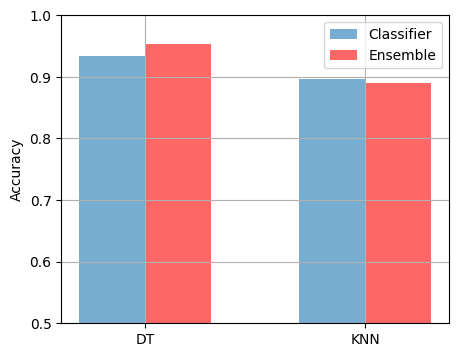

In [151]:
names = MainDict.keys()
y_pos = np.arange(len(names))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos-0.15, Classifiers_Models_Dict.values(), align='center', width = 0.3, alpha=0.6, label = "Classifier")
plt.bar(y_pos+0.15, Ensemble_Bag_Dict.values(), align='center', color = 'r', width = 0.3, alpha=0.6,label = "Ensemble")
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
plt.ylim((0.5,1))
plt.grid(axis = 'both')
plt.legend(loc = 'upper right')
plt.show()

c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10

KMeans inertia is:  1435858514872.1428
KMeans inertia is:  403320964992.6286
KMeans inertia is:  221390007919.72043
KMeans inertia is:  160693094096.75824
KMeans inertia is:  121762721329.20328


c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans inertia is:  99846398531.9066
KMeans inertia is:  86623000010.2536


c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans inertia is:  75093080077.23024
KMeans inertia is:  68610269364.512184


c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans inertia is:  58645713731.69415
KMeans inertia is:  53104118449.7438


c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans inertia is:  47888753457.81988
KMeans inertia is:  44379202786.389275


c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans inertia is:  41087814446.02079


c:\Users\Hassan\Desktop\FCI\FCI_4th_YEAR\TERM_1\Projects\DataMining_Project\PY_VENV\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans inertia is:  38857910082.37986


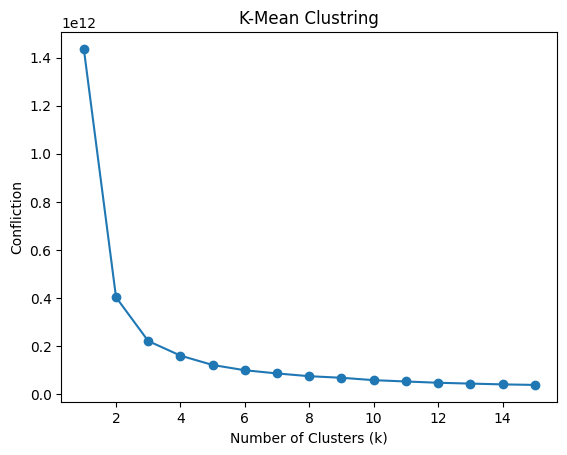

In [152]:

# \\\\\\\\\\\\ Clustring Task \\\\\\\\\\\\\ #

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_train , y_train)
    distortions.append(kmeans.inertia_)
    print("KMeans inertia is: " , kmeans.inertia_)

plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Confliction')
plt.title('K-Mean Clustring')
plt.show()
